In [1]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
from matplotlib.dates import DateFormatter
from datetime import datetime as dt

In [17]:
root = '/Users/yuhan/Desktop/tools/takayabe/IncomeDiversity-main/'
auxdata = root+"auxdata/"

In [12]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Fig 3A

In [13]:
city_name = 'boston'
boston = gpd.read_file(auxdata+city_name+"_pop_income.geojson", driver="GeoJSON")
boston.CensusBlockGroup = boston.CensusBlockGroup.astype("str")
boston["dummy"] = 0
boston_cbgs = boston[boston["population"]>0]
boston_cbgs.CensusBlockGroup = boston_cbgs.CensusBlockGroup.astype("int64")
boston_plot = boston_cbgs.dissolve(by="dummy")


<Axes: >

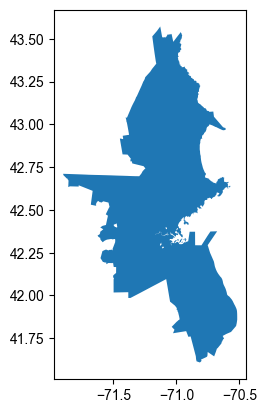

In [14]:
boston_plot.plot()

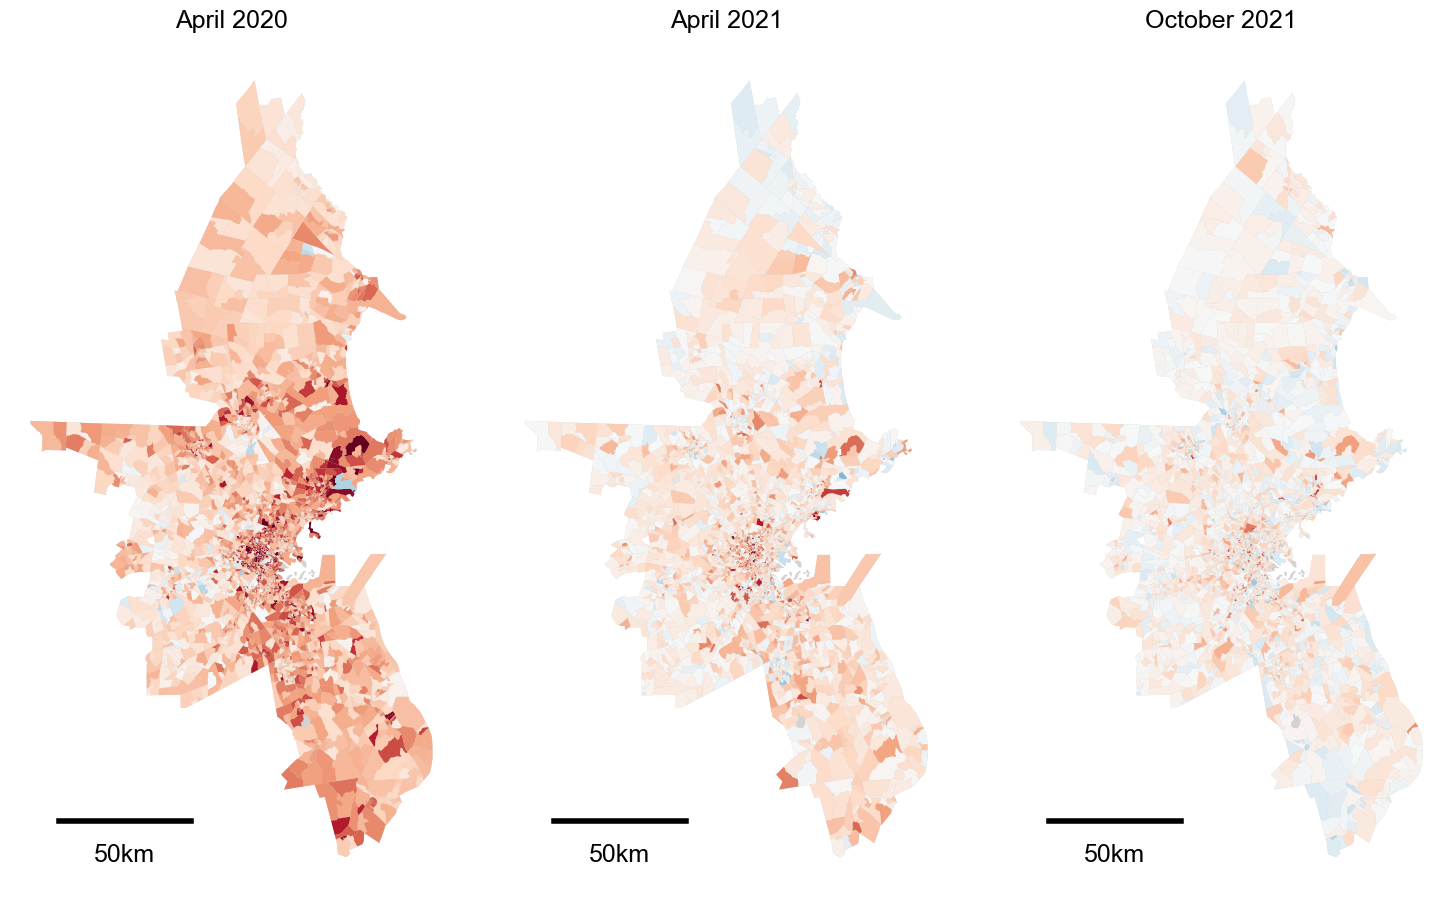

In [23]:
fig,ax = plt.subplots(1,3,gridspec_kw={'width_ratios':[1,1,1]}, figsize=(15,9))
fig.patch.set_facecolor('white')

for i,(thisdate,title) in enumerate(zip(["2020-04-01","2021-04-01","2021-10-01"], 
                                        ["April 2020","April 2021","October 2021"])):
    
    quant_seg2 = gpd.read_file(root+"fig3/DcbgDiff_"+thisdate+".geojson", driver='GeoJSON')
    quant_seg2.plot(ax=ax[i], column="diff_perc", cmap="RdBu", zorder=3, vmin=-100, vmax=100)
    boston_plot.plot(ax=ax[i], color="lightgray", zorder=1)

    ax[i].text((0.1+25/110)/1.27, 0.04, "50km", transform=ax[i].transAxes, size=18, ha="center")
    ax[i].plot([-71.8,-71.8+(50/110)],[41.7,41.7], color="k", linewidth=4, zorder=5)
    ax[i].axis('off')
    ax[i].set_title(title, fontsize=18, pad=10)
    
plt.tight_layout()
plt.show()

# Fig 3B

In [6]:
df = pd.read_csv(root+"fig3/fig3B.csv")
cats = df[df['lab']=='d_cat']['val'].values
mobs = df[df['lab']=='d_mob']['val'].values
ress = df[df['lab']=='d_res']['val'].values
cats2 = df[df['lab']=='dd_cat']['val'].values
mobs2 = df[df['lab']=='dd_mob']['val'].values
ress2 = df[df['lab']=='dd_res']['val'].values

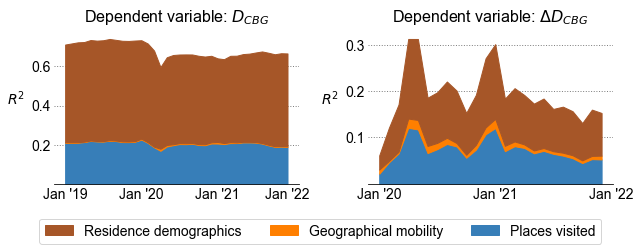

In [7]:
fig,axes = plt.subplots(1,2,gridspec_kw={'width_ratios':[1,1]}, figsize=(9,3))

ax = axes[0]
ax.fill_between(np.arange(36), 0, cats, color=CB_color_cycle[0], zorder=2)
ax.fill_between(np.arange(36), cats, cats+mobs, color=CB_color_cycle[1], zorder=3)
ax.fill_between(np.arange(36), cats+mobs, cats+mobs+ress, color=CB_color_cycle[4], zorder=5)
ax.set_ylabel(r"$R^2$", fontsize=14, rotation=0, labelpad=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([0,12,24,35])
ax.set_xticklabels(["Jan '19","Jan '20","Jan '21","Jan '22"], fontsize=14)
ax.set_yticks([.2,.4,.6])
ax.set_yticklabels([.2,.4,.6], fontsize=14)
for l in [.2,.4,.6]:
    ax.axhline(l, color='gray', linewidth=1, linestyle=":",zorder=1)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title("Dependent variable: "+r"$D_{CBG}$", fontsize=16, pad=10)
ax.set_ylim(0)

z = 0
ax = axes[1]
ax.fill_between(np.arange(24-z), 0, cats2[z:], color=CB_color_cycle[0], zorder=2)
ax.fill_between(np.arange(24-z), cats2[z:], cats2[z:]+mobs2[z:], color=CB_color_cycle[1], zorder=3)
ax.fill_between(np.arange(24-z), cats2[z:]+mobs2[z:], cats2[z:]+mobs2[z:]+ress2[z:], 
                   color=CB_color_cycle[4], zorder=5)
ax.fill_between([], [], [], color=CB_color_cycle[4], zorder=5, label='Residence demographics')
ax.fill_between([], [], [], color=CB_color_cycle[1], zorder=3, label='Geographical mobility')
ax.fill_between([], [], [], color=CB_color_cycle[0], zorder=2, label='Places visited')

ax.set_ylabel(r"$R^2$", fontsize=14, rotation=0, labelpad=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylim(0)
ax.set_xticks([0,12-z,24-z])
ax.set_xticklabels(["Jan '20","Jan '21","Jan '22"], fontsize=14)
ax.set_yticks([.1,.2,.3])
ax.set_yticklabels([.1,.2,.3], fontsize=14)
for l in [.1,.2,.3]:
    ax.axhline(l, color='gray', linewidth=1, linestyle=":", zorder=1)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title("Dependent variable: "+r"$\Delta D_{CBG}$", fontsize=16, pad=10)

leg = fig.legend(ncol=3, fontsize=14, loc="lower center", bbox_to_anchor=(.5,-.18))
plt.tight_layout()
plt.show()    

# Fig 3C

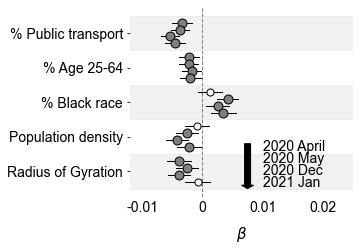

In [8]:
df = pd.read_csv(root+"fig3/fig3C.csv")

fig,ax = plt.subplots(figsize=(4,3.5))
for i,(dt,col,lab) in enumerate(zip(["2020-04-01","2020-05-01","2020-12-01","2021-01-01"], 
                                ["r","orangered","orange","g"],
                                ["2020 April","2020 May","2020 Dec","2021 Jan"])):
    this = df[(df['date']==dt)]
    for j in np.arange(len(this)):
        ax.plot([this["lower"].values[j], this["upper"].values[j]], 
                [this["y"].values[j],this["y"].values[j]], 
                linewidth=1, color='k', zorder=2)
        fcol = 'white'
        msize = 50
        if (this["lower"].values[j]>0) | (this["upper"].values[j]<0):
            fcol = 'gray'
            msize = 80
        if j==0:
            ax.scatter(this["val"].values[j], j+i*0.2, edgecolor='k', facecolor=fcol, s=msize, label=lab, zorder=3)
        else:
            ax.scatter(this["val"].values[j], j+i*0.2, edgecolor='k', facecolor=fcol, s=msize, zorder=3)
    
for j in np.arange(len(this)):
    if j%2==0:
        ax.fill_between(np.arange(-1,1.1,1), j-0.2*1, j+1-0.2*1, alpha=.3, color='lightgray', zorder=1)
    
ax.set_xlabel(r"$\beta$", fontsize=15, rotation=0, labelpad=10)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axvline(0, color='gray', linewidth=1, linestyle="--")
ax.set_xlim(-0.012,0.025)
ax.invert_yaxis()
ax.set_yticks(np.arange(len(this))+0.2*1.5)
names = []
for n in this['name']:
    names.append(n.replace("\n"," "))
ax.set_yticklabels(names, fontsize=14)
ax.set_xticks([-.01,0,.01,.02])
ax.set_xticklabels(['-0.01','0','0.01','0.02'], fontsize=14)
ax.tick_params(axis=u'x', which=u'both',length=0)

ax.arrow(0.0075, 3.5,0,1.2, head_width=0.002, head_length=0.1, fc='k', ec='k', zorder=5)
for i,d in enumerate(["2020 April","2020 May","2020 Dec","2021 Jan"]):
    ax.annotate(d, xy=(0.01, 3.7+i*0.35), color="k", rotation=0, fontsize=14) 

plt.show()